# Geometry

In this tutorial we explore how simulated geometries can be defined. The package we use to define finite difference meshes and fields is `discretisedfield`.

In [1]:
import discretisedfield as df
%matplotlib inline

Let us say that we need to define a nanocube mesh with edge length $L=100\,\text{nm}$ and discretisation cell $(d, d, d)$, with $d=10 \,\text{nm}$. For that we need to define two points between which the mesh spans $p_{1}$ and $p_{2}$ and give them (together with the discretisation cell) to the `Mesh` class.

In [2]:
L = 100e-9  # edge length (m)
d = 10e-9  # cell size (m)

p1 = (0, 0, 0)
p2 = (L, L, L)
cell = (d, d, d)

mesh = df.Mesh(p1=p1, p2=p2, cell=cell)

We can then inspect some basic parameters of the mesh:

In [3]:
print("Edge lengths: {} m".format(mesh.l))
print("Number of discretisation cells: {}".format(mesh.n))
print("Point with minimum coordinates: {} m".format(mesh.pmin))
print("Point with maximum coordinates: {} m".format(mesh.pmax))

Edge lengths: (1e-07, 1e-07, 1e-07) m
Number of discretisation cells: (10, 10, 10)
Point with minimum coordinates: (0, 0, 0) m
Point with maximum coordinates: (1e-07, 1e-07, 1e-07) m


Or we can visualise the mesh domain and a discretisation cell:

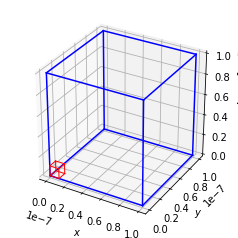

In [4]:
mesh

After we defined a mesh, we can define different finite difference field. For that, we use `Field` class. We need to provide the mesh, value dimension, and the value of the field. Let us define a uniform magnetisation field (`dim=3`) in the $(1, 0, 0)$ direction.

In [5]:
m = df.Field(mesh, dim=3, value=(1, 0, 0))

A simple slice visualisation of the mesh in the $z$ direction at $L/2$ is:

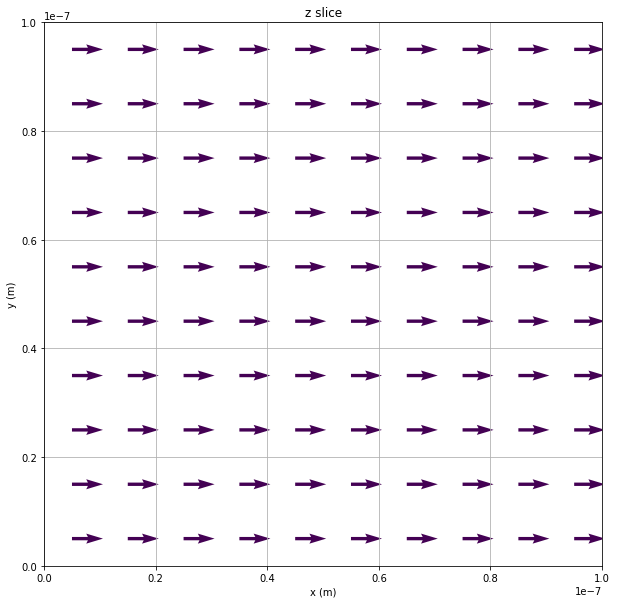

In [6]:
m.plot_slice("z", L/2);

When we defined a uniform vector field, we used a tuple to define its value. However, we can also provide a Python function if we want to define a non-uniform field. This function takes the position in the mesh, and returns a value for that point.

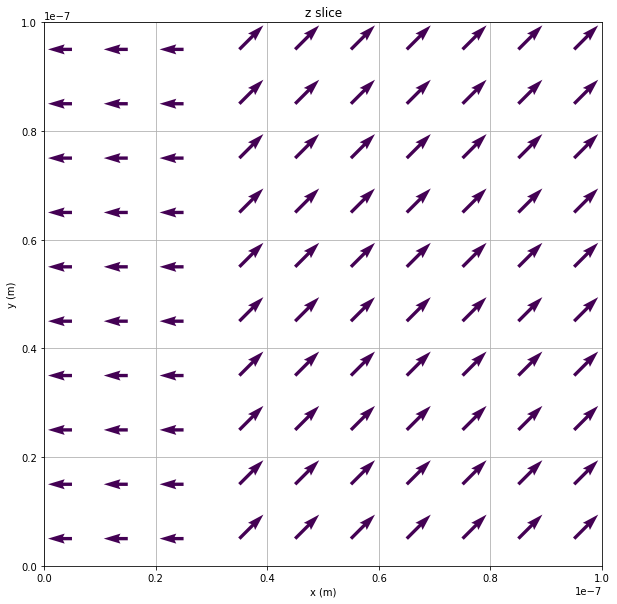

In [7]:
def m_value(pos):
    x, y, z = pos  # unpack position into individual components
    if x > L/4:
        return (1, 1, 0)
    else:
        return (-1, 0, 0)
    
m = df.Field(mesh, dim=3, value=m_value)

m.plot_slice("z", L/2);

We can now inspect the average of the magnetisation field:

In [8]:
print("Average: {}".format(m.average))

Average: (0.40000000000000002, 0.69999999999999996, 0.0)


So far, we had to provide the value of magnetisation field in order to define it. However, in micromagnetics, we usually have to provide the magnitude of magnetisation - saturation magnetisation. We can provide it as a norm to the magnetisation field.

In [9]:
Ms = 8e6  # saturation magnetisation (A/m)

m = df.Field(mesh, dim=3, value=m_value, norm=Ms)

print("Average: {}".format(m.average))

Average: (1559797.9746446714, 3959797.9746446069, 0.0)


By defining different norms, we can specify different geometries, so that $M_\text{s}=0$ outside the mesh. For instance, let us assume we want to define a sphere of radius $L/2$ and magnetise it in the negative $y$ direction.

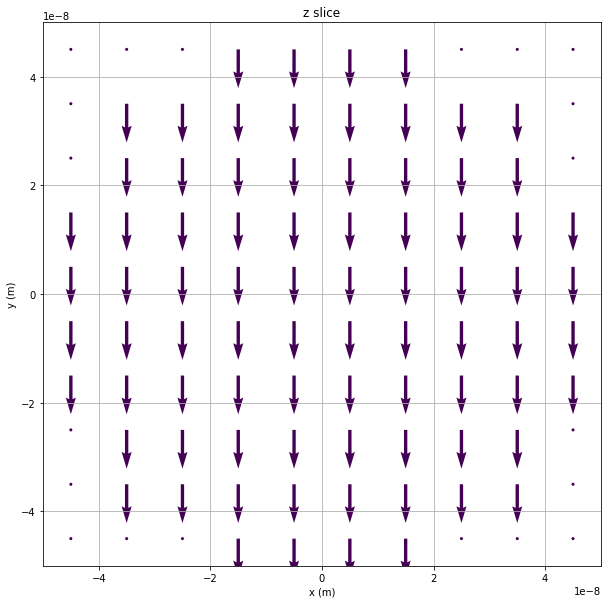

In [10]:
mesh = df.Mesh(p1=(-L/2, -L/2, -L/2), p2=(L/2, L/2, L/2), cell=(d, d, d))

def Ms_value(pos):
    x, y, z = pos
    if (x**2 + y**2 + z**2)**0.5 < L/2:
        return Ms
    else:
        return 0

m = df.Field(mesh, dim=3, value=(0, -1, 0), norm=Ms_value)

m.plot_slice("z", 0);

## Exercise 1

Define a two-dimensional disk magnetisation field with thickness $t = 10 \,\text{nm}$ and diameter $d = 120 \,\text{nm}$ with cell edge $5 \,\text{nm}$. The magnetisation is:

$$\mathbf{m} = \begin{cases} (-1, 0, 0) & \text{for } y \le 0 \\ (1, 0, 0) & \text{for } y > 0 \,\text{nm} \end{cases}$$

with saturation magnetisation $10^{7} \,\text{A}\,\text{m}^{-1}$.

## Exercise 2

Define a two dimensional vector field in the following geometry with $10 \,\text{nm}$ thickness:

   <img src="geometry_exercise2.png",width=400>

The magnetisation saturation is $8 \times 10^{6} \,\text{A}\,\text{m}^{-1}$ and the magnetisation direction is as shown in the figure.

## Solutions

### Exercise 1

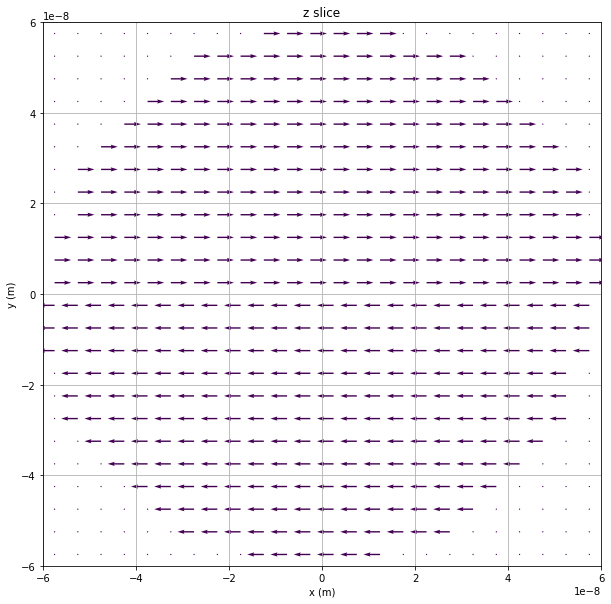

In [11]:
t = 10e-9  # thickness (m)
d = 120e-9  # diameter (m)
cell = (5e-9, 5e-9, 5e-9)  # discretisation cell size (m)
Ms = 1e7  # saturation magnetisation (A/m)

mesh = df.Mesh(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, t), cell=cell)

def Ms_value(pos):
    x, y, z = pos
    if (x**2 + y**2)**0.5 < d/2:
        return Ms
    else:
        return 0
    
def m_value(pos):
    x, y, z = pos
    if y > 0:
        return (1, 0, 0)
    else:
        return (-1, 0, 0)
    
m = df.Field(mesh, value=m_value, norm=Ms_value)

m.plot_slice("z", 0);

**Comment**

Show them that `dim=3` by default.

### Exercise 2

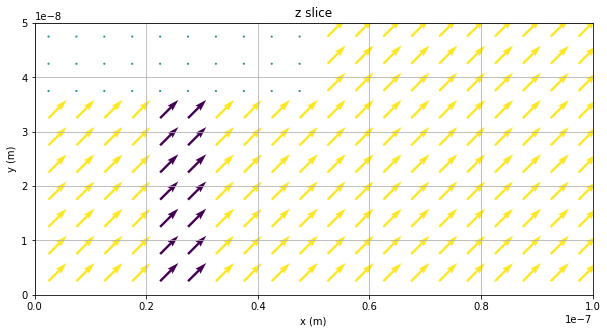

In [15]:
cell = (5e-9, 5e-9, 5e-9)  # discretisation cell size (m)
Ms = 8e6  # saturation magnetisation (A/m)

mesh = df.Mesh(p1=(0, 0, 0), p2=(100e-9, 50e-9, 10e-9), cell=cell)

def Ms_value(pos):
    x, y, z = pos
    if x < 50e-9 and y > 35e-9:
        return 0
    else:
        return Ms
    
def m_value(pos):
    x, y, z = pos
    if 20e-9 < x < 30e-9:
        return (1, 1, -1)
    else:
        return (1, 1, 1)
    
m = df.Field(mesh, value=m_value, norm=Ms_value)

m.plot_slice("z", 0);